## Imoprt Libraries

In [1]:
import numpy as np
import pandas as pd


In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential, load_model

C:\Users\merin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt



In [11]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tensorflow


  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\merin\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [14]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam

In [5]:
import seaborn as sns
import cv2



In [6]:
pip install opencv-python --user


  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
Note: you may need to restart the kernel to use updated packages.


## Data Loading

In [6]:
data_dir=r"Train"
data=[]
for file in os.listdir(data_dir):
    data+=[file]
print(data)
print(len(data))

['cardiovascular', 'No_cardiovascular']
2


## Data Preprocessing

In [7]:
img_height,img_width=224,224
batch_size=20

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 1907 images belonging to 2 classes.
Found 815 images belonging to 2 classes.


## Applying CNN Algorithm

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2, activation="softmax"))

model.summary()

C:\Users\merin\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,634,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,793,154 (37.36 MB)

 Trainable params: 9,793,154 (37.36 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit(train_generator,epochs=20,validation_data=test_generator,verbose=1)

Epoch 1/20


C:\Users\merin\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.6336 - loss: 0.6440 - val_accuracy: 0.5853 - val_loss: 0.6910
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.7168 - loss: 0.5654 - val_accuracy: 0.4957 - val_loss: 0.9486
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7664 - loss: 0.5131 - val_accuracy: 0.5571 - val_loss: 1.0382
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.7853 - loss: 0.4850 - val_accuracy: 0.5816 - val_loss: 0.8106
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.7525 - loss: 0.4985 - val_accuracy: 0.4626 - val_loss: 0.9014
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.7691 - loss: 0.4652 - val_accuracy: 0.5718 - val_loss: 0.9886
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7962 - loss: 0.4443 - val_accuracy: 0.5877 - val_loss: 1.0231
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8114 - loss: 0.4068 - val_accuracy: 0.5926 - val_loss: 1.

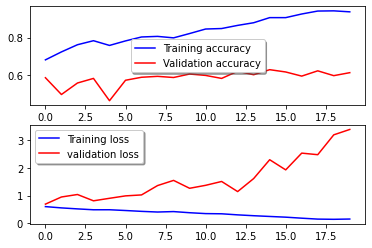

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
model.evaluate(test_generator)
model.save("models/CNN.h5")

41/41 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.5913 - loss: 3.4270


## Applying MobileNet Algorithm

In [19]:
base_model = tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model1 = Sequential()
model1.add(base_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(2, activation='sigmoid'))
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ ?                           │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [20]:
model1.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist1=model1.fit(train_generator,epochs=10,validation_data=test_generator,verbose=1)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.7427 - loss: 0.6093 - val_accuracy: 0.7043 - val_loss: 0.8744
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.8869 - loss: 0.2657 - val_accuracy: 0.7816 - val_loss: 0.7221
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9381 - loss: 0.1631 - val_accuracy: 0.7656 - val_loss: 0.8389
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9589 - loss: 0.1243 - val_accuracy: 0.7939 - val_loss: 0.7301
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9625 - loss: 0.1175 - val_accuracy: 0.7730 - val_loss: 0.7681
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.9821 - loss: 0.0548 - val_accuracy: 0.5656 - val_loss: 4.7181
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9822 - loss: 0.0411 - val_accuracy: 0.7828 - val_loss: 0.6729
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.9582 - loss: 0.1222 - val_accuracy: 0.8000 - v

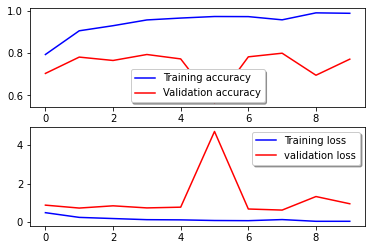

In [21]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['loss'], color='b', label="Training loss")
ax[1].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [22]:
model1.evaluate(test_generator)
model1.save("models/MobileNet.h5")

41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 852ms/step - accuracy: 0.7735 - loss: 0.9410


ValueError: Unable to synchronously create dataset (name already exists)

## Clacate the Accurarcy

In [23]:
Accuracy = []

for i in [hist, hist1]:
    x = i.history.get('accuracy')[-1]
    Accuracy.append(x)

Accuracy

[0.9370739459991455, 0.988987922668457]

## Classification Output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
[0.21407348 0.7526395 ]


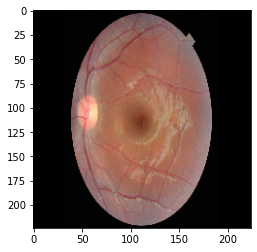

Prediction: No_cardiovascular


In [24]:
from skimage import io
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\merin\OneDrive\Desktop\TK143960\CODE\Backend\Train\cardiovascular\10 - Copy (2).jpg", target_size=(224,224))
show_img=image.load_img(r"C:\Users\merin\OneDrive\Desktop\TK143960\CODE\Backend\Train\cardiovascular\10 - Copy (2).jpg", target_size=(224, 224))
data = data
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model1.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',data[ind])